In [1]:
from acc_ut import *
from general_utilities import find_participant,get_subject

In [2]:
dataset_path="C:\\Users\\jeuux\\Desktop\\Carrera\\MoAI\\TFM\\AnnotatedData\\Accelerometer_Data\\Datasets"
main_dir="C:\\Users\\jeuux\\Desktop\\Carrera\\MoAI\\TFM"


# Interactive Active Learning Loop (0=still,1=movement)

In [3]:
from modAL.models import ActiveLearner
from modAL.uncertainty import uncertainty_sampling
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing


#dataset
data=pd.read_csv(os.path.join(dataset_path,"acc_data_train.csv"))

n_feat=210
feat_cols = ['feat'+str(i) for i in range(n_feat)]
##Obtain initial ground truth
initial_idx = data.dropna().index
X_initial=data.loc[initial_idx,feat_cols].values
y_initial=data.loc[initial_idx,"target"].values

##erasing ground truth from table
data_train=data.drop(initial_idx).reset_index(drop=True)

##Getting unlabeled instances
X_pool=data_train[feat_cols].values
y_pool=data_train.target.values

# # #normalize batch features ,here??
# X_pool = preprocessing.scale(X_pool)  ##We have to save the means used to preprocess here...

# # initializing the learner
learner = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=uncertainty_sampling,
    X_training=X_initial, y_training=y_initial
)


C:\Users\jeuux\Anaconda2\envs\CVision\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Type class of video...
2


ValueError: list.remove(x): x not in list

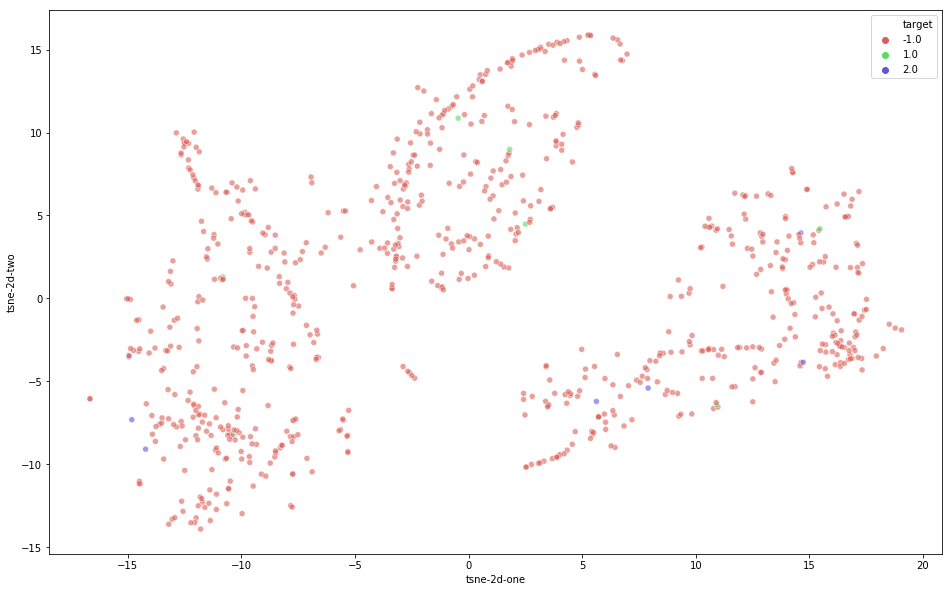

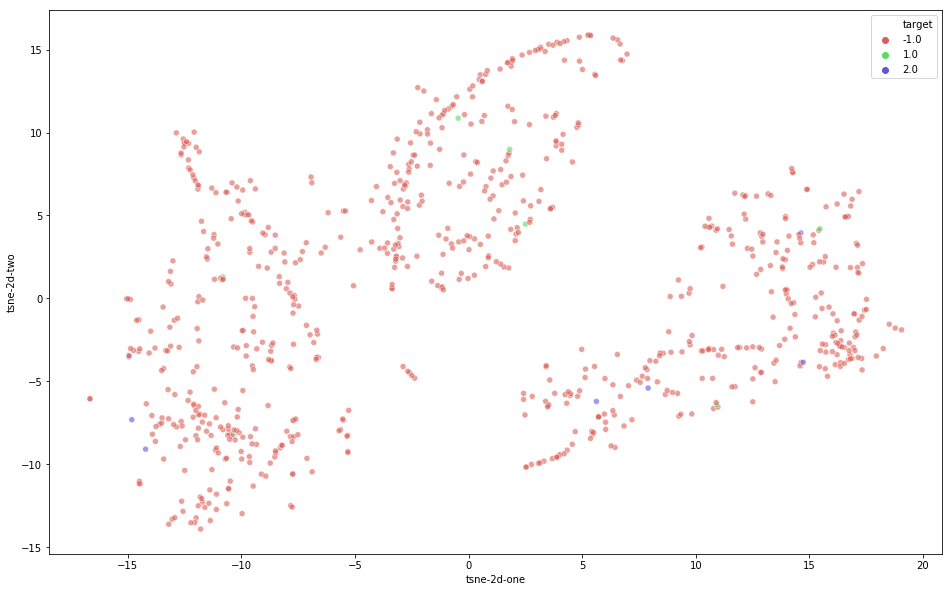

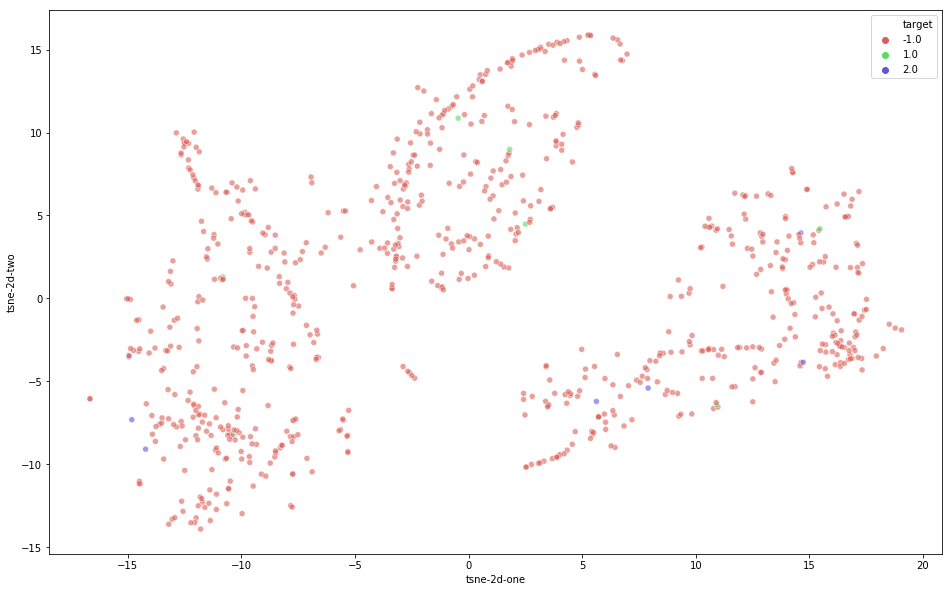

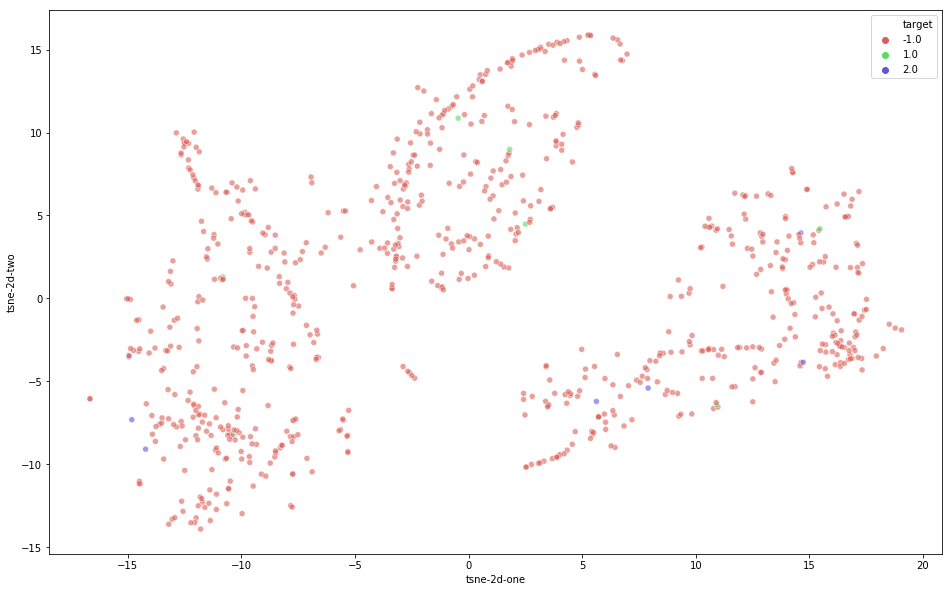

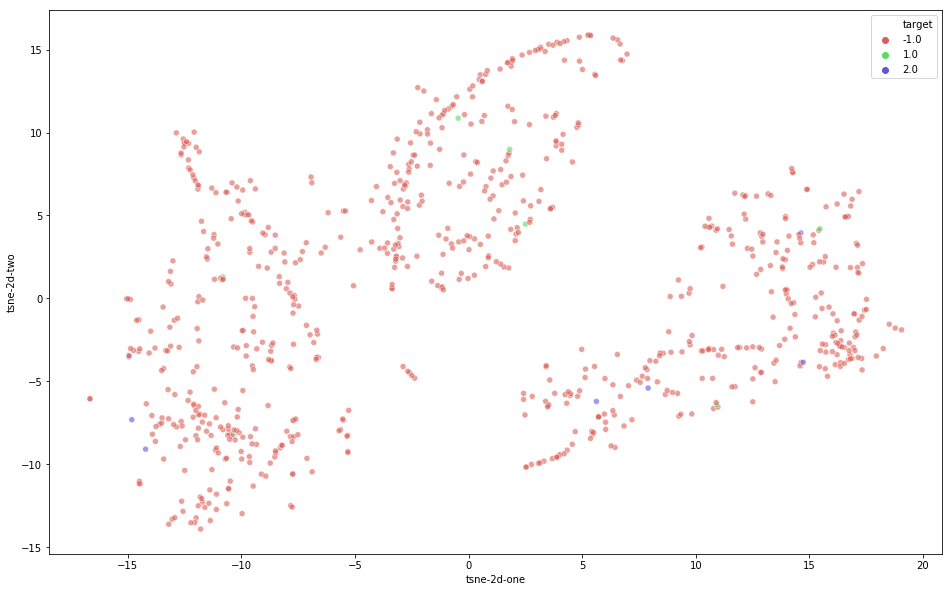

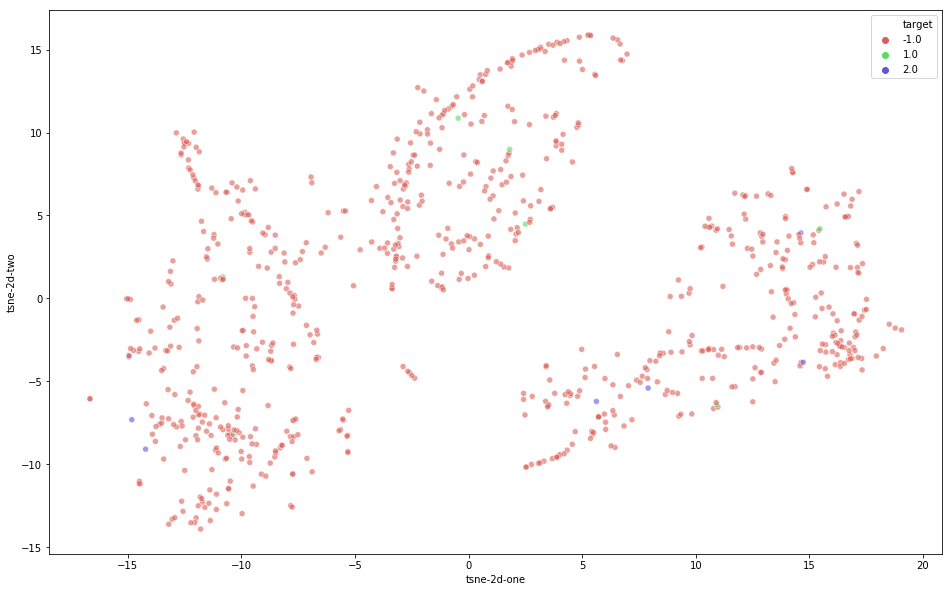

In [6]:
from IPython.display import Video,clear_output,display
possible_idx=data_train.index.tolist()
# data=fit_tsne(data,n_feat)
n_queries=10

for i in range(n_queries):
    clear_output(wait=True)
    #Get new instance to label
    query_idx, query_inst = learner.query(X_pool[possible_idx])
    start_time,participant=get_metadata(query_idx,data_train)
    video_clip=get_unlabeled_clip(start_time,participant,query_idx,main_dir)
    #Label new instance
    y_new=oracle_annotations(video_clip)
    ##Update label in dataset
    data_train.loc[query_idx,"target"]=y_new
    #Train with new annotated label
    learner.teach(query_inst.reshape(1, -1), y_new)
    #Remove index from selected instance from future possible indexes
    possible_idx.remove(query_idx)
    ##Plot coloured t-sne
    plot_tsne(data)
   
    
    
#     X_pool = np.delete(X_pool, query_idx, axis=0)
#     data_copy=data_copy.drop(query_idx).reset_index(drop=True)
    


# TSNE with giro features (save to compare to just acc features)

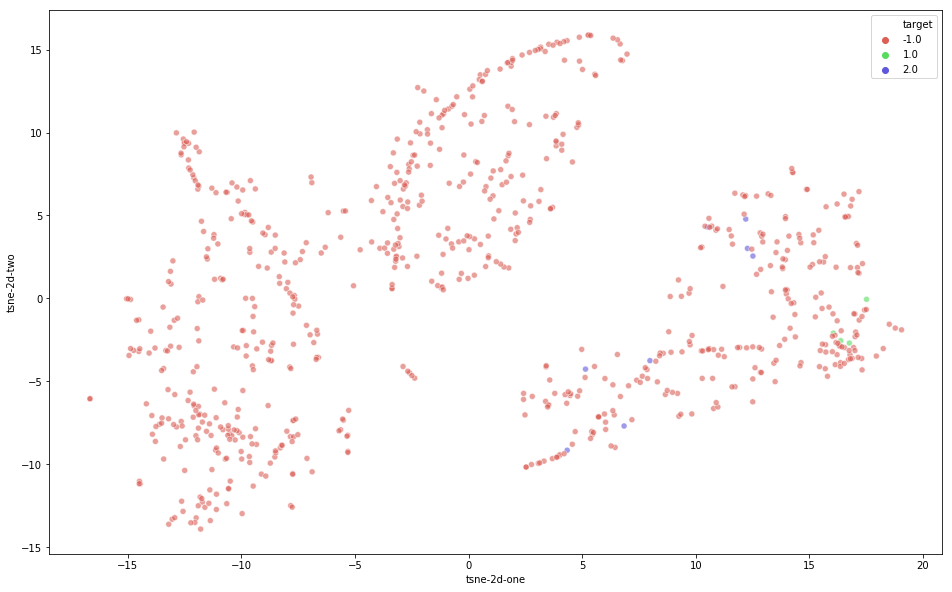

In [7]:
plot_tsne(data_train)


# TSNE with just acc features

In [13]:
table_path="C:\\Users\\jeuux\\Desktop\\Carrera\\MoAI\\TFM\\AnnotatedData\\Accelerometer_Data\\Acc_data_train.csv"
data=pd.read_csv(table_path)
feat_cols=[col for col in data.columns if "feat" in col]
n_feat=len(feat_cols)

In [14]:
data=fit_tsne(data,n_feat)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 862 samples in 0.005s...
[t-SNE] Computed neighbors for 862 samples in 0.104s...
[t-SNE] Computed conditional probabilities for sample 862 / 862
[t-SNE] Mean sigma: 22.861682
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.394222
[t-SNE] KL divergence after 300 iterations: 0.679674
Finished T-SNE


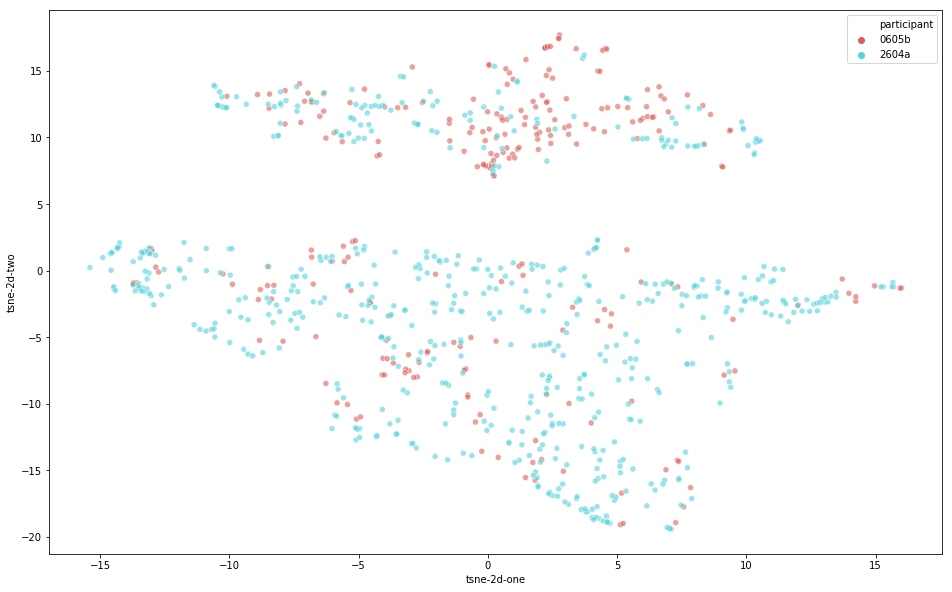

In [16]:
plot_tsne(data,hue="participant")

# T-sne

In [3]:
import seaborn as sns
from sklearn.manifold import TSNE

# table_path="C:\\Users\\jeuux\\Desktop\\Carrera\\MoAI\\TFM\\AnnotatedData\\Accelerometer_Data\\acc_data_new_train.csv"
# data=pd.read_pickle(table_path)

def fit_tsne(data,n_feat):
    feat_cols = ['feat'+str(i) for i in range(n_feat)]
    data_subset = data[feat_cols].values

    tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
    tsne_results = tsne.fit_transform(data_subset)
    print('Finished T-SNE')

    data['tsne-2d-one'] = tsne_results[:,0]
    data['tsne-2d-two'] = tsne_results[:,1]
    
    return data


In [4]:
def plot_tsne(data,hue="target"):
    plt.figure(figsize=(16,10))
    data=data.fillna(-1)
    sns.scatterplot(
        x="tsne-2d-one", y="tsne-2d-two",
        hue=hue,
        palette=sns.color_palette("hls", len(pd.unique(data[hue]))),
        data=data,
        legend="full",
        alpha=0.6
    )

In [ ]:
plot_tsne(data)